<a href="https://colab.research.google.com/github/noahruiz416/Tempe_Traffic_Classification/blob/main/Tempe_Traffic_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook is the initial prototype for the Tempe Traffic Classification Project. Within this file you will find various sections that conduct exploratory analysis, feature selection, initial models and more.

## Exploratory Analysis

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
no_null_vals = pd.read_csv("no_null_vals_df.csv")
null_vals_df = pd.read_csv("null_vals_df.csv")

In [7]:
no_null_vals['Injuryseverity'].value_counts()

No Injury                    24272
Possible Injury               5558
Non Incapacitating Injury     3991
Suspected Minor Injury        1241
Incapacitating Injury          480
Suspected Serious Injury       105
Fatal                           80
Name: Injuryseverity, dtype: int64

In [66]:
no_null_vals['Injuryseverity'].value_counts()

No Injury                    24272
Possible Injury               5558
Non Incapacitating Injury     3991
Suspected Minor Injury        1241
Incapacitating Injury          480
Suspected Serious Injury       105
Fatal                           80
Name: Injuryseverity, dtype: int64

In [146]:
#one vs all encoding (add to etl later), this will be used for classifcation of accident being fatal or not 
Severity = []
for row in no_null_vals['Injuryseverity']:
  if row != "Fatal": 
    Severity.append(0)
  if row == "Fatal":
    Severity.append(1)

In [147]:
no_null_vals['Fatal_Non_Fatal'] = Severity

In [148]:
no_null_vals['Fatal_Non_Fatal'].value_counts()

0    35647
1       80
Name: Fatal_Non_Fatal, dtype: int64

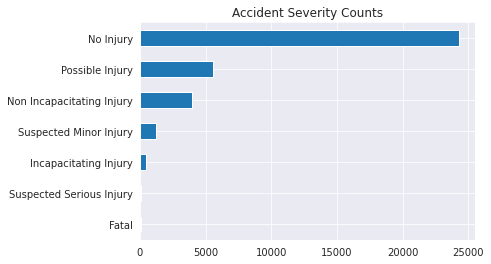

In [8]:
#getting an idea of the predictor variables distribution
sns.set_style("darkgrid")
no_null_vals['Injuryseverity'].value_counts().sort_values().plot.barh(title = 'Accident Severity Counts')

In [61]:
no_null_vals['Injuryseverity'].value_counts(normalize=True).sort_values()

Fatal                        0.002239
Suspected Serious Injury     0.002939
Incapacitating Injury        0.013435
Suspected Minor Injury       0.034736
Non Incapacitating Injury    0.111708
Possible Injury              0.155569
No Injury                    0.679374
Name: Injuryseverity, dtype: float64

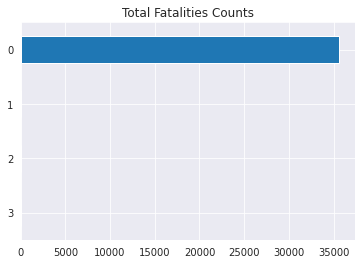

In [37]:
#based on this less than 
no_null_vals['Totalfatalities'].value_counts().sort_values().plot.barh(title = 'Total Fatalities Counts')

In [59]:
no_null_vals['Totalfatalities'].value_counts()
print(f"Percent of fatal accidents: {round((80/35647) * 100, 3)}%. Percent of nonfatal accidents: {round((35647-80)/ (35647) * 100, 3)}%.")

Percent of fatal accidents: 0.224%. Percent of nonfatal accidents: 99.776%.


In [9]:
year_injuries = no_null_vals[['Year', 'Totalinjuries']].groupby('Year').sum()
year_fatalities = no_null_vals[['Year', 'Totalfatalities']].groupby('Year').sum()

[Text(0.5, 1.0, 'Injuries From 2012 - 2020')]

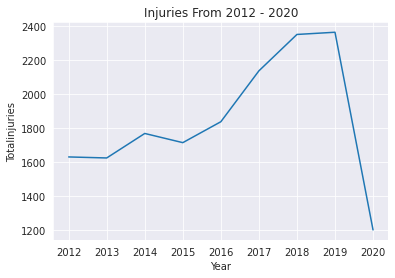

In [10]:
#plotting the
sns.lineplot(x = 'Year', y = 'Totalinjuries', data = year_injuries).set(title = 'Injuries From 2012 - 2020')

[Text(0.5, 1.0, 'Fatalities From 2012 - 2020')]

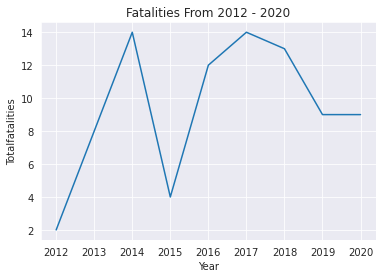

In [11]:
sns.lineplot(x = 'Year', y = 'Totalfatalities', data = year_fatalities).set(title = 'Fatalities From 2012 - 2020')

In [12]:
#no features seem correlated at a first glance 
no_null_vals.corr()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
X,1.000000,0.163788,-0.020296,-0.020115,-0.020612,-0.006258,0.007678,0.002757,-0.017894,-0.015308,0.163788,1.000000
Y,0.163788,1.000000,0.019561,0.019097,0.019328,0.021733,-0.013407,0.003570,-0.045517,-0.094131,1.000000,0.163788
OBJECTID,-0.020296,0.019561,1.000000,0.999134,0.992468,-0.006595,0.041621,0.010008,0.056947,0.022429,0.019561,-0.020296
Incidentid,-0.020115,0.019097,0.999134,1.000000,0.991447,-0.006466,0.042838,0.012021,0.057101,0.022363,0.019097,-0.020115
Year,-0.020612,0.019328,0.992468,0.991447,1.000000,-0.006009,0.041154,0.009601,0.056163,0.023218,0.019328,-0.020612
Distance,-0.006258,0.021733,-0.006595,-0.006466,-0.006009,1.000000,0.000769,0.001440,-0.000947,-0.004222,0.021733,-0.006258
Totalinjuries,0.007678,-0.013407,0.041621,0.042838,0.041154,0.000769,1.000000,0.014031,-0.075798,-0.013430,-0.013407,0.007678
Totalfatalities,0.002757,0.003570,0.010008,0.012021,0.009601,0.001440,0.014031,1.000000,0.008623,0.015354,0.003570,0.002757
Age_Drv1,-0.017894,-0.045517,0.056947,0.057101,0.056163,-0.000947,-0.075798,0.008623,1.000000,0.028526,-0.045517,-0.017894
Age_Drv2,-0.015308,-0.094131,0.022429,0.022363,0.023218,-0.004222,-0.013430,0.015354,0.028526,1.000000,-0.094131,-0.015308


In [13]:
no_null_vals['AlcoholUse_Drv2'].value_counts()

No Apparent Influence    35636
Alcohol                     91
Name: AlcoholUse_Drv2, dtype: int64

In [14]:
#initial categorical dummies for now
dummies = pd.get_dummies(no_null_vals[['Weather', 'SurfaceCondition','Lightcondition', 
                                       'AlcoholUse_Drv1', 'AlcoholUse_Drv2',
                                       'DrugUse_Drv1', 'DrugUse_Drv2']])

In [15]:
no_null_vals['Weather']

0         Clear
1         Clear
2         Clear
3         Clear
4         Clear
          ...  
35722     Clear
35723    Cloudy
35724    Cloudy
35725      Rain
35726     Clear
Name: Weather, Length: 35727, dtype: object

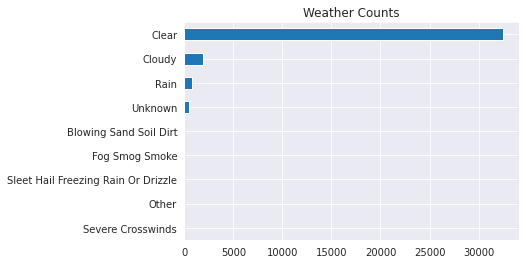

In [16]:
##exploring categorical features
no_null_vals['Weather'].value_counts().sort_values().plot.barh(title = 'Weather Counts')

In [17]:
no_null_vals['Weather'].value_counts()

Clear                                  32492
Cloudy                                  1955
Rain                                     776
Unknown                                  485
Blowing Sand Soil Dirt                     8
Fog Smog Smoke                             5
Sleet Hail Freezing Rain Or Drizzle        3
Other                                      2
Severe Crosswinds                          1
Name: Weather, dtype: int64

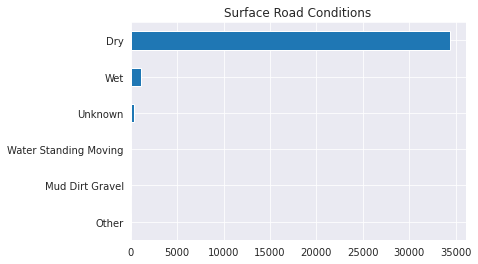

In [18]:
no_null_vals['SurfaceCondition'].value_counts().sort_values().plot.barh(title = 'Surface Road Conditions')

In [19]:
no_null_vals['SurfaceCondition'].value_counts()

Dry                      34352
Wet                       1058
Unknown                    312
Water Standing Moving        3
Other                        1
Mud Dirt Gravel              1
Name: SurfaceCondition, dtype: int64

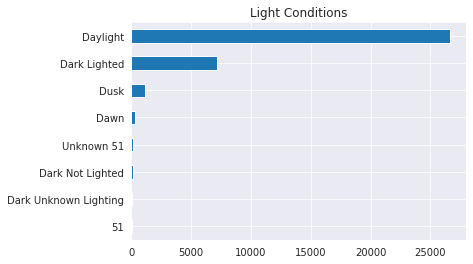

In [20]:
no_null_vals['Lightcondition'].value_counts().sort_values().plot.barh(title = 'Light Conditions')

In [21]:
no_null_vals['Lightcondition'].value_counts()

Daylight                 26646
Dark Lighted              7178
Dusk                      1183
Dawn                       277
Unknown 51                 174
Dark Not Lighted           161
Dark Unknown Lighting       69
51                          39
Name: Lightcondition, dtype: int64

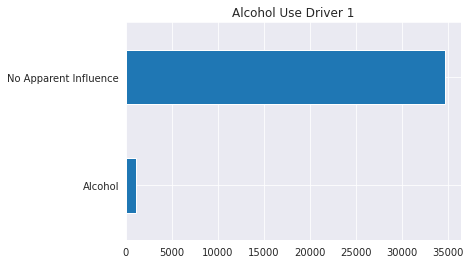

In [22]:
no_null_vals['AlcoholUse_Drv1'].value_counts().sort_values().plot.barh(title = 'Alcohol Use Driver 1')

In [23]:
no_null_vals['AlcoholUse_Drv1'].value_counts()

No Apparent Influence    34665
Alcohol                   1062
Name: AlcoholUse_Drv1, dtype: int64

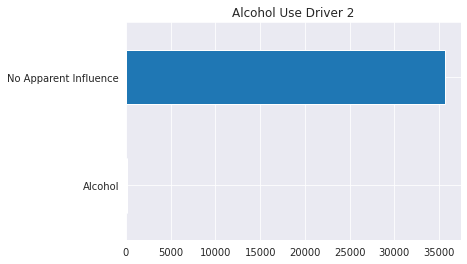

In [24]:
no_null_vals['AlcoholUse_Drv2'].value_counts().sort_values().plot.barh(title = 'Alcohol Use Driver 2')

In [25]:
no_null_vals['AlcoholUse_Drv2'].value_counts()

No Apparent Influence    35636
Alcohol                     91
Name: AlcoholUse_Drv2, dtype: int64

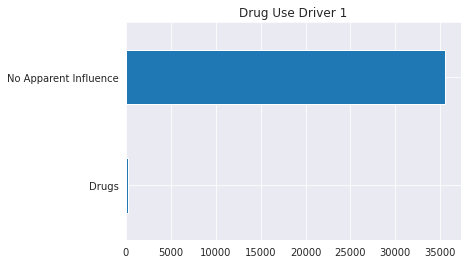

In [26]:
no_null_vals['DrugUse_Drv1'].value_counts().sort_values().plot.barh(title = 'Drug Use Driver 1')

In [27]:
no_null_vals['DrugUse_Drv1'].value_counts()

No Apparent Influence    35512
Drugs                      215
Name: DrugUse_Drv1, dtype: int64

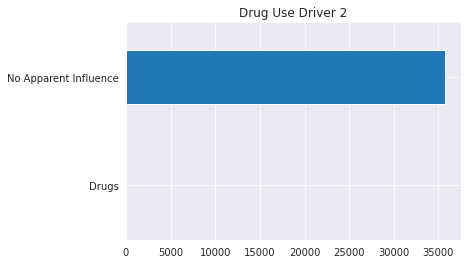

In [28]:
no_null_vals['DrugUse_Drv2'].value_counts().sort_values().plot.barh(title = 'Drug Use Driver 2')

In [29]:
no_null_vals['DrugUse_Drv2'].value_counts()

No Apparent Influence    35714
Drugs                       13
Name: DrugUse_Drv2, dtype: int64

In [30]:
no_null_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    35727 non-null  float64
 1   Y                    35727 non-null  float64
 2   OBJECTID             35727 non-null  int64  
 3   Incidentid           35727 non-null  int64  
 4   DateTime             35727 non-null  object 
 5   Year                 35727 non-null  int64  
 6   StreetName           35727 non-null  object 
 7   CrossStreet          35727 non-null  object 
 8   Distance             35727 non-null  float64
 9   JunctionRelation     35727 non-null  object 
 10  Totalinjuries        35727 non-null  int64  
 11  Totalfatalities      35727 non-null  int64  
 12  Injuryseverity       35727 non-null  object 
 13  Collisionmanner      35727 non-null  object 
 14  Lightcondition       35727 non-null  object 
 15  Weather              35727 non-null 

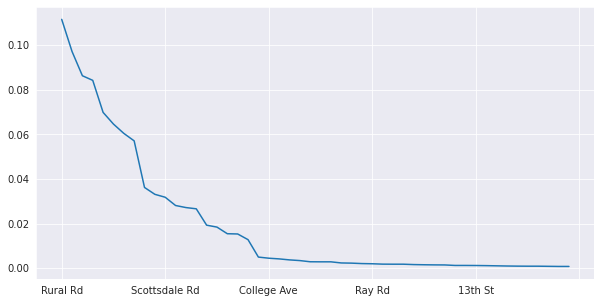

In [95]:
#exploring which street names occur frequently
no_null_vals['StreetName'].value_counts(normalize=True).head(50).plot(figsize=(10,5))

## Initial Logistic Model, to confirm existince of imbalanced data, our analysis shows that imbalance does exist, so we will continue to analyze this area 

In [118]:
dummies = pd.get_dummies(no_null_vals[['Collisionmanner', 'Lightcondition', 'Weather',
                                       'SurfaceCondition', 'Age_Drv1', 'Age_Drv2',
                                       'AlcoholUse_Drv1', 'AlcoholUse_Drv2',
                                       'DrugUse_Drv1', 'DrugUse_Drv2']])


In [141]:
dummies2 = no_null_vals[['Collisionmanner', 'Lightcondition', 'Weather',
                                       'SurfaceCondition', 'Age_Drv1', 'Age_Drv2',
                                       'AlcoholUse_Drv1', 'AlcoholUse_Drv2',
                                       'DrugUse_Drv1', 'DrugUse_Drv2']]

In [189]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

X = dummies
y = no_null_vals['Fatal_Non_Fatal']

lb.fit(y)

y = lb.transform(no_null_vals['Fatal_Non_Fatal'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [194]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
from sklearn import metrics
y_pred=logistic.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3566,    0],
       [   7,    0]])

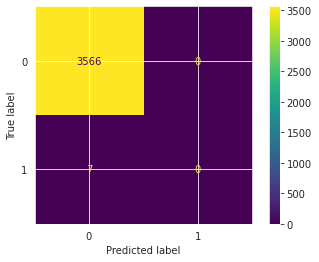

In [196]:
#evaluating initial model
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style("darkgrid")
ConfusionMatrixDisplay.from_estimator(logistic, X_test, y_test)
plt.show()

In [197]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9980408620207109
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
